In [1]:
import sherpa
sherpa.__version__

'4.14.0'

In [2]:
import gammapy
gammapy.__version__

'0.20.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

# Sherpa analysis

In [4]:
import sherpa.astro.ui as ui

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


In [5]:
filename = "XMM_test_files/MOS1_PWN.grp"
ui.load_pha(1, filename)

read ARF file XMM_test_files/MOS1_PWN.arf
read RMF file XMM_test_files/MOS1_PWN.rmf
read background file XMM_test_files/MOS1_PWN_bkg.fits


/home/lucagiunti/miniconda3/envs/gammapyXrayFINALTEST/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF 'XMM_test_files/MOS1_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/gammapyXrayFINALTEST/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF 'XMM_test_files/MOS1_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)


In [6]:
ui.notice(2, 8)

In [7]:
ui.set_stat("wstat")

In [8]:
ui.set_source(ui.xstbabs.absorption * ui.powlaw1d.pl)

absorption.nh = 5
pl.gamma = 1.8
pl.ampl = 4e-4

In [9]:
ui.guess(pl)

In [10]:
ui.fit()
result_sherpa = ui.get_fit_results()

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.


Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 261.162
Final fit statistic   = 15.5153 at function evaluation 46
Data points           = 30
Degrees of freedom    = 27
Probability [Q-value] = 0.961567
Reduced statistic     = 0.574642
Change in statistic   = 245.647
   absorption.nH   4.69176      +/- 1.64855     
   pl.gamma       1.49335      +/- 0.488464    
   pl.ampl        0.000312457  +/- 0.000258539 


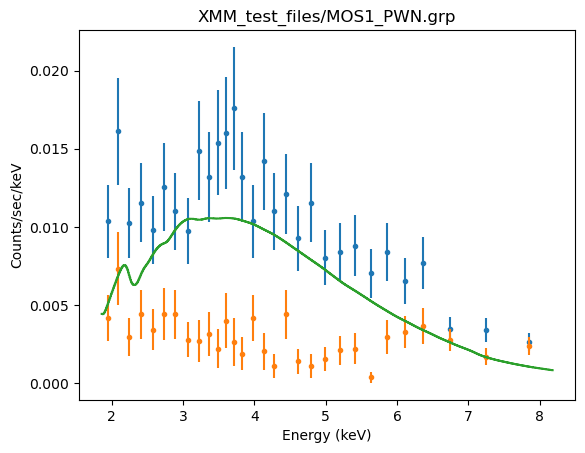

In [11]:
ui.plot_data()
ui.plot_bkg(overplot=True)
ui.plot_model(overplot=True)

# Gammapy analysis

In [12]:
from gammapy.modeling import Fit

In [13]:
from GammapyXray import SherpaSpectralModel, SherpaSpectrumDataset

In [14]:
from sherpa.astro.ui import unpack_pha
from sherpa.stats import WStat
from sherpa.models.basic import PowLaw1D
from sherpa.astro.xspec import XSTBabs

In [15]:
data = unpack_pha("XMM_test_files/MOS1_PWN.grp")

read ARF file XMM_test_files/MOS1_PWN.arf
read RMF file XMM_test_files/MOS1_PWN.rmf
read background file XMM_test_files/MOS1_PWN_bkg.fits


/home/lucagiunti/miniconda3/envs/gammapyXrayFINALTEST/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF 'XMM_test_files/MOS1_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/gammapyXrayFINALTEST/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF 'XMM_test_files/MOS1_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)


In [16]:
stat = WStat()

In [17]:
dataset = SherpaSpectrumDataset(data, stat)

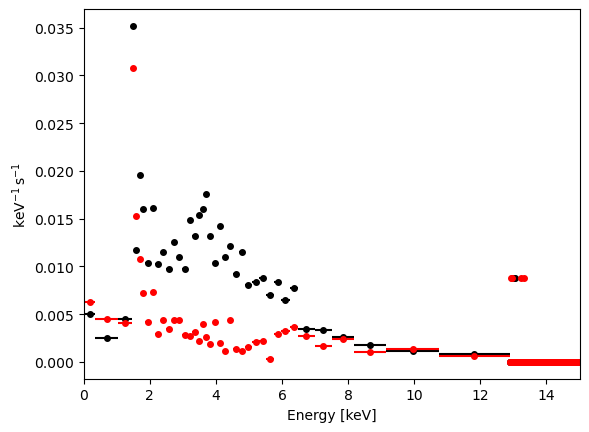

In [18]:
dataset.counts.plot(color="k")
dataset.background.plot(color="r")
plt.yscale("linear")

In [19]:
dataset.notice(2, 8, ignore=False)

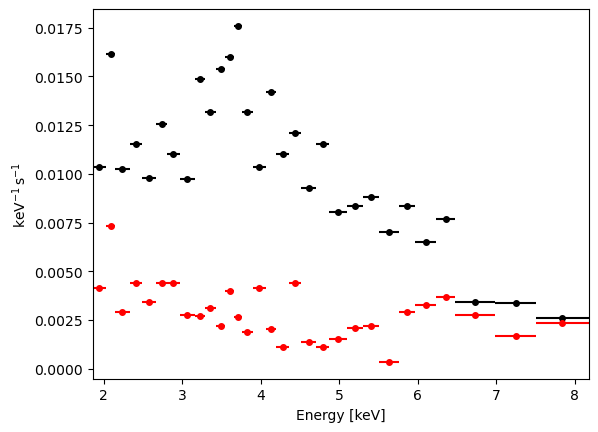

In [20]:
dataset.counts.plot(color="k")
dataset.background.plot(color="r")
plt.yscale("linear")

In [21]:
pl = PowLaw1D()
pl.gamma.val = 1.8
pl.ampl.val = 4e-4
pl.ampl.min = 1e-7
pl.ampl.max = 1e-1
absorption = XSTBabs()
absorption.nH = 5
model = pl*absorption

In [22]:
wrapped_model = SherpaSpectralModel(model)

In [23]:
dataset.models = [wrapped_model]

In [24]:
fit = Fit()
result_gammapy = fit.run([dataset])

In [25]:
result_gammapy

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 105
	total stat : 15.52

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

In [26]:
result_gammapy.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str5,float64,str1,float64,float64,float64,bool,bool,str1
spectral,gamma,1.4947e+00,,4.801e-01,-1.000e+01,1.000e+01,False,False,
spectral,ref,1.0000e+00,,0.000e+00,-3.403e+38,3.403e+38,True,False,
spectral,ampl,3.1322e-04,,2.575e-04,1.000e-07,1.000e-01,False,True,
spectral,nH,4.6969e+00,,1.714e+00,0.000e+00,1.000e+06,False,False,


In [27]:
wrapped_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str5,float64,str1,float64,float64,float64,bool,bool,str1
spectral,gamma,1.4947e+00,,4.801e-01,-1.000e+01,1.000e+01,False,False,
spectral,ref,1.0000e+00,,0.000e+00,-3.403e+38,3.403e+38,True,False,
spectral,ampl,3.1322e-04,,2.575e-04,1.000e-07,1.000e-01,False,True,
spectral,nH,4.6969e+00,,1.714e+00,0.000e+00,1.000e+06,False,False,


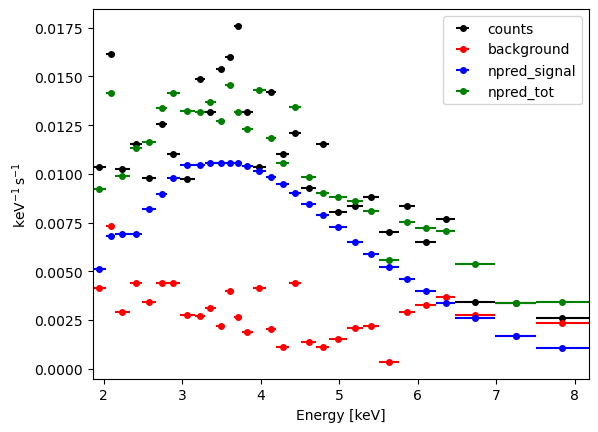

In [28]:
dataset.counts.plot(color="k", label="counts")
dataset.background.plot(color="r", label="background")
dataset.npred_signal().plot(color="b", label="npred_signal")
(dataset.background+dataset.npred_signal()).plot(color="g", label="npred_tot")

plt.legend()
plt.yscale("linear")

# Comparison

<AxesSubplot:title={'center':'XMM_test_files/MOS1_PWN.grp'}, xlabel='Energy [keV]', ylabel='Counts/sec/keV'>

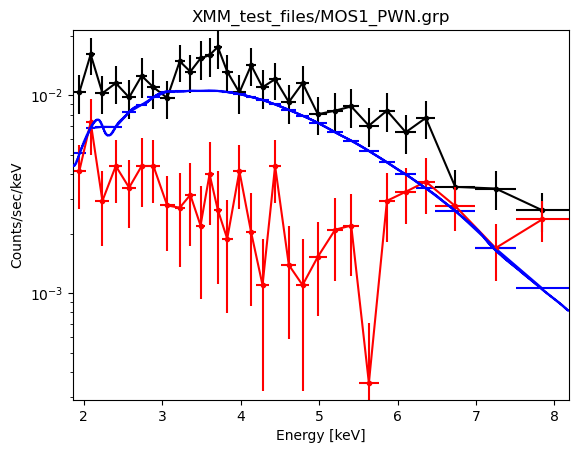

In [29]:
# Sherpa
ui.plot_data(color="k", )
ui.plot_bkg(color="r", overplot=True)
ui.plot_model(color="b", overplot=True)

# Gammapy
dataset.counts.plot(color="k", ls="-", markersize=0, label="counts")
dataset.background.plot(color="r", ls="-", markersize=0, label="background")
dataset.npred_signal().plot(color="b", ls="-", markersize=0, label="npred_signal")

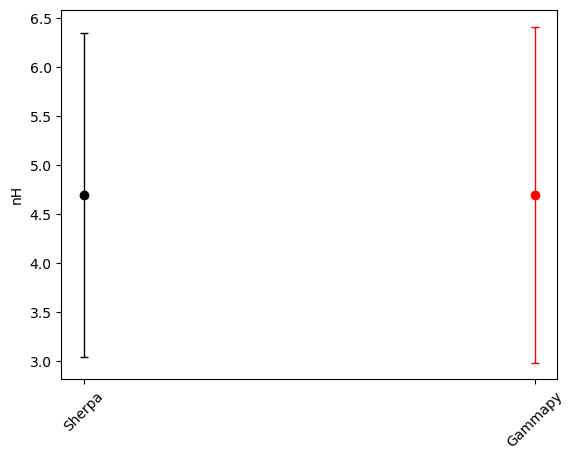

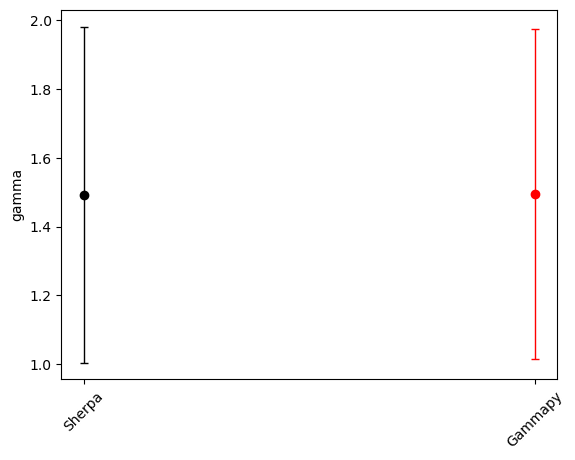

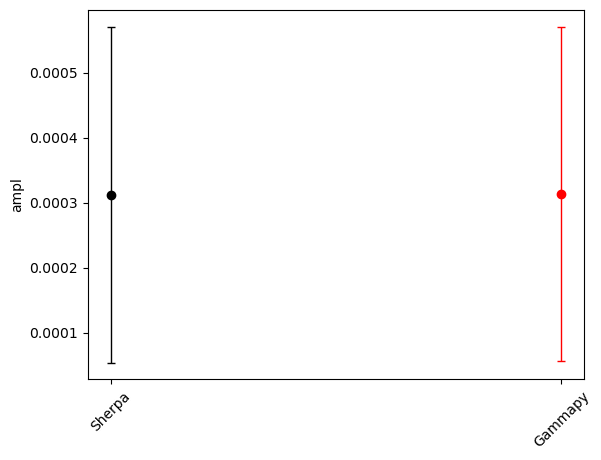

In [64]:
parnames = result_sherpa.parnames

for idx, name in enumerate(parnames):
    # Sherpa
    value_sherpa = result_sherpa.parvals[idx]
    error_sherpa = np.sqrt(result_sherpa.covar[idx][idx])

    # Gammapy
    idx_dot = name.find('.')
    name_gammapy = name[idx_dot+1:]
    par_gammapy = result_gammapy.parameters[name_gammapy]
    value_gammapy = par_gammapy.value
    error_gammapy = par_gammapy.error
    
    plt.errorbar(
        x=0,
        y=value_sherpa,
        yerr=error_sherpa,
        color="k",
        capsize=3,
        lw=1,
        marker="o"
    )
    plt.errorbar(
        x=1,
        y=value_gammapy,
        yerr=error_gammapy,
        color="r",
        capsize=3,
        lw=1,
        marker="o"
    )
    plt.xticks([0, 1], ["Sherpa", "Gammapy"], rotation=45)
    plt.ylabel(name_gammapy)
    plt.show()
    plt.close()